In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression


# Além da Regressão Linear

Assim como os métodos de classificação tem como ponto de partida a regressão logística, os **regressores** tem como ponto de partida a regressão linear.

No entanto, a regressão linear é inadequada em muitas situações. Vamos ver alguns motivos pelas quais uma regressão linear pode ser uma escolha inadequada para resolver nosso problema:

1. **Colinearidade** muitas vezes as variáveis de entrada do nosso modelo apresentam correlações entre si. Podemos extender esse conceito e *imaginar um dataset onde as variáveis de entrada são, em si, resultados de outros modelos*.
1. **Função não-linear desconhecida**: Vimos que mesmo sendo *linear* uma regressão pode representar relações mais complexas através da transformação de variáveis. No entanto, isso parte do pressuposto que conhecemos, ou que pelo menos conseguimos descobrir, qual a função que liga cada uma de nossas variáveis de entrada à variável resposta.

Hoje veremos alguns métodos para tratar essas duas questões - primeiro extendendo o modelo da regressão e depois através dos algoritmos de Machine Learning.

## Dataset

Na aula de hoje utilizaremos o dataset `Ames Housing Dataset`, obtido através do Kaggle (https://www.kaggle.com/c/house-prices-advanced-regression-techniques). Este dataset é uma extensão e atualização dos dados de uma tabela muito utilizada na construção e validação de métodos estatísticos, o Boston Housing Dataset.

O dataset completo compreende 81 variáveis, e a tarefa é, utilizando parte dessas variáveis, estimar o preço de venda de imóveis.  Os dados da tabela foram coletados entre 2006 e 2010 na cidade de Ames em Iowa-EUA a partir da venda de imóveis. Nosso objetivo será construir um modelo que a partir das caracteristicas da casa e sua localização seja capaz de prever o preço pelo qual esta foi vendida!

In [2]:
tb_housing = pd.read_csv("data/tb_ames_housing.csv")


Uma boa parte das variáveis presentes são variáveis categóricas. Para aula de hoje focaremos na análise das variáveis continuas, simplificando a análise do resultado dos modelos. Primeiro, vamos mapear quais colunas são numéricas e, destas, quais contém variáveis explanatórias (removendo IDs, variáveis relativas à data e variáveis categóricas codificadas como número).

In [3]:
tb_housing.select_dtypes(include=[np.number]).columns


Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

Antes de excluir as variáveis de data vamos calcular a idade do imóvel no momento da venda através do tempo entre a última reforma (ou construção do imóvel) e a data de venda.

In [4]:
tb_housing["age_when_sold"] = tb_housing["YrSold"] - tb_housing["YearRemodAdd"]


In [5]:
col_exclude = [
    "Id",
    "MSSubClass",
    "MoSold",
    "YrSold",
    "GarageYrBlt",
    "YearBuilt",
    "YearRemodAdd",
]
tb_housing_num = (
    tb_housing.select_dtypes(include=[np.number])
    .drop(col_exclude, axis=1)
    .dropna()
    .copy()
)


Agora vamos separar selecionar nossas variáveis de entrada (escolhendo-as através da lista x_vars) e separar nossos dados em train e test para termos boas estimativas do erro de cada modelo construído.

In [6]:
x_vars = [
    "LotFrontage",
    "LotArea",
    "OverallQual",
    "OverallCond",
    "MasVnrArea",
    "BsmtFinSF1",
    "BsmtFinSF2",
    "BsmtUnfSF",
    "TotalBsmtSF",
    "1stFlrSF",
    "2ndFlrSF",
    "LowQualFinSF",
    "GrLivArea",
    "BsmtFullBath",
    "BsmtHalfBath",
    "FullBath",
    "HalfBath",
    "BedroomAbvGr",
    "KitchenAbvGr",
    "TotRmsAbvGrd",
    "Fireplaces",
    "GarageCars",
    "GarageArea",
    "WoodDeckSF",
    "OpenPorchSF",
    "EnclosedPorch",
    "3SsnPorch",
    "ScreenPorch",
    "PoolArea",
    "MiscVal",
    "age_when_sold",
]
X_train, X_test, y_train, y_test = train_test_split(
    tb_housing_num[x_vars], tb_housing_num["SalePrice"], test_size=0.2
)
scaler = StandardScaler()
scaler.fit(X_train)


StandardScaler()

Como estaremos construindo modelos cujo protótipo é a regressão linear, vamos construir uma e medir o erro para termos um baseline de performance dos modelos seguintes.

In [7]:
lin_fit = LinearRegression()
lin_fit.fit(scaler.transform(X_train), y_train)
y_pred = lin_fit.predict(scaler.transform(X_test))
from sklearn.metrics import mean_squared_error

print(
    f"Erro de ${round(np.sqrt(mean_squared_error(y_test, y_pred)), 2)} em ${round(np.mean(y_pred), 2)}"
)


Erro de $33503.98 em $179673.16


## Extensões da Regressão

### Regressão Lasso

A regressão de Lasso trata a questão de colinearidade penalizando os coeficientes de variáveis correlatas entre si. O lasso aumenta a esparsidade dos coeficientes, reduzindo alguns coeficientes à zero e mantendo outros intactos.

**Quando utilizar:** quando temos uma estrutura de correlação entre as variáveis de entrada complexa e queremos um modelo interpretável sem sacrificar o poder preditivo do conjunto completo de variáveis.

**Análogo** uma regressão linear onde fizemos um feature selection que ao invés de excluir variáveis reduz a importância delas no modelo.

In [8]:
from sklearn.linear_model import LassoCV


A interface de utilização da regressão de lasso dentro da SKLEARN é igual aos outros modelos: inicializamos o objeto através da classe `LassoCV`, importada do sub-módulo `sklearn.linear_model`, e utilizamos o método fit para iniciar a aprendizagem do modelo.

O único hiperparâmetro de inicialização do modelo é a quantidade de dobras na validação cruzada: como o Lasso precisa estimar um parâmetro de regularização a função utiliza internamente uma validação cruzada para escolhe este parâmetro de forma ótima.

In [9]:
las_fit = LassoCV(cv=5)
las_fit.fit(scaler.transform(X_train), y_train)


LassoCV(cv=5)

In [10]:
y_pred = las_fit.predict(scaler.transform(X_test))
from sklearn.metrics import mean_squared_error

print(
    f"Erro de ${round(np.sqrt(mean_squared_error(y_test, y_pred)), 2)} em ${round(np.mean(y_test), 2)}"
)


Erro de $37030.51 em $180017.4


O erro da regressão de lasso é maior! Será que isso indica um modelo pior? Vamos comparar os coeficientes estimados para cada variável para entender melhor o que está acontencedo. Primeiro vamos inicializar um dataframe com os coeficienetes da regressão lasso.

In [11]:
coef_lin = pd.DataFrame(
    np.round(las_fit.coef_, 2), index=X_train.columns, columns=["lasso_fit"]
)


In [12]:
coef_lin

,lasso_fit
LotFrontage,0.00
LotArea,1707.30
OverallQual,33078.64
OverallCond,0.00
MasVnrArea,2681.15
BsmtFinSF1,4051.29
BsmtFinSF2,0.00
BsmtUnfSF,-0.00
TotalBsmtSF,4062.29
1stFlrSF,1749.67


Agora vamos acrescentar os coeficientes da regressão linear.

In [13]:
coef_lin["lin_fit"] = lin_fit.coef_


O que podemos inferir da tabela abaixo?

In [14]:
coef_lin


,lasso_fit,lin_fit
LotFrontage,0.00,4.789969e+02
LotArea,1707.30,4.699910e+03
OverallQual,33078.64,2.818611e+04
OverallCond,0.00,1.965611e+03
MasVnrArea,2681.15,5.352900e+03
BsmtFinSF1,4051.29,-1.816156e+16
BsmtFinSF2,0.00,-6.206363e+15
BsmtUnfSF,-0.00,-1.754514e+16
TotalBsmtSF,4062.29,1.765544e+16
1stFlrSF,1749.67,-1.771772e+15


Vamos analisar os 5 coeficientes que apresentaram a maior diferença relativa entre as duas regressões.

In [15]:
coef_lin["diff_lin_lasso"] = abs(coef_lin["lin_fit"] - coef_lin["lasso_fit"])/abs(coef_lin["lin_fit"])
coef_lin = coef_lin.sort_values("diff_lin_lasso", ascending=False)
coef_lin.head()


,lasso_fit,lin_fit,diff_lin_lasso
1stFlrSF,1749.67,-1.771772e+15,1.0
BsmtFinSF1,4051.29,-1.816156e+16,1.0
LotFrontage,0.00,4.789969e+02,1.0
ScreenPorch,0.00,4.316745e+03,1.0
EnclosedPorch,-0.00,-1.348400e+03,1.0


O caminho do lasso (`lasso path`) é a forma como o método foi 'encolhendo' cada coeficiente. A função `LassoCV` utiliza-se de validação cruzada para escolher um ponto neste caminho que minimize o erro de projeção. Podemos visualizar o caminho do lasso através do método `path`. Primeiro vamos inicializar um DataFrame com os dados do caminho de cada variável.

In [24]:
las_fit.path(scaler.transform(X_train), y_train)[0]

array([66844.51771838, 62339.42094495, 58137.95261602, 54219.64919064,
       50565.42630203, 47157.48580585, 43979.22909313, 41015.1762456 ,
       38250.89063965, 35672.9086318 , 33268.67398308, 31026.47670298,
       28935.3960152 , 26985.24716716, 25166.53182457, 23470.39180904,
       21888.56595377, 20413.34986696, 19037.55840702, 17754.49068687,
       16557.89743679, 15441.9505669 , 14401.21478109, 13430.62110403,
       12525.44219234, 11681.26930977, 10893.99085413, 10159.77233148,
        9475.03767991,  8836.45185213,  8240.90457187,  7685.49518507,
        7167.51853205,  6684.45177184,  6233.9420945 ,  5813.7952616 ,
        5421.96491906,  5056.5426302 ,  4715.74858058,  4397.92290931,
        4101.51762456,  3825.08906396,  3567.29086318,  3326.86739831,
        3102.6476703 ,  2893.53960152,  2698.52471672,  2516.65318246,
        2347.0391809 ,  2188.85659538,  2041.3349867 ,  1903.7558407 ,
        1775.44906869,  1655.78974368,  1544.19505669,  1440.12147811,
      

In [16]:
lasso_path = pd.DataFrame(
    las_fit.path(scaler.transform(X_train), y_train)[1].T, columns=X_train.columns
)
lasso_path["alpha"] = las_fit.path(scaler.transform(X_train), y_train)[0]
lasso_path.head()

,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,age_when_sold,alpha
0,0.0,0.0,4.676097e-11,-0.0,0.0,0.0,-0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,-0.0,0.0,0.0,0.0,-0.0,-0.0,66844.517718
1,0.0,0.0,4.505097e+03,-0.0,0.0,0.0,-0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,-0.0,0.0,0.0,0.0,-0.0,-0.0,62339.420945
2,0.0,0.0,8.706565e+03,-0.0,0.0,0.0,-0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,-0.0,0.0,0.0,0.0,-0.0,-0.0,58137.952616
3,0.0,0.0,1.262487e+04,-0.0,0.0,0.0,-0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,-0.0,0.0,0.0,0.0,-0.0,-0.0,54219.649191
4,0.0,0.0,1.627909e+04,-0.0,0.0,0.0,-0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,-0.0,0.0,0.0,0.0,-0.0,-0.0,50565.426302


Agora vamos utilizar o método `melt` para transformar este DataFrame em formato longo.

In [18]:
lasso_path_long = lasso_path.melt(id_vars = ['alpha'])
lasso_path_long.head(10)

,alpha,variable,value
0,66844.517718,LotFrontage,0.0
1,62339.420945,LotFrontage,0.0
2,58137.952616,LotFrontage,0.0
3,54219.649191,LotFrontage,0.0
4,50565.426302,LotFrontage,0.0
5,47157.485806,LotFrontage,0.0
6,43979.229093,LotFrontage,0.0
7,41015.176246,LotFrontage,0.0
8,38250.890640,LotFrontage,0.0
9,35672.908632,LotFrontage,0.0


In [19]:
lasso_path_long[lasso_path_long['variable'] == 'OverallQual']

,alpha,variable,value
200,66844.517718,OverallQual,4.676097e-11
201,62339.420945,OverallQual,4.505097e+03
202,58137.952616,OverallQual,8.706565e+03
203,54219.649191,OverallQual,1.262487e+04
204,50565.426302,OverallQual,1.627909e+04
...,...,...,...
295,88.364519,OverallQual,2.832254e+04
296,82.409046,OverallQual,2.831447e+04
297,76.854952,OverallQual,2.830700e+04
298,71.675185,OverallQual,2.830003e+04


In [21]:
lasso_path_long['abs_value'] = abs(lasso_path_long['value'])

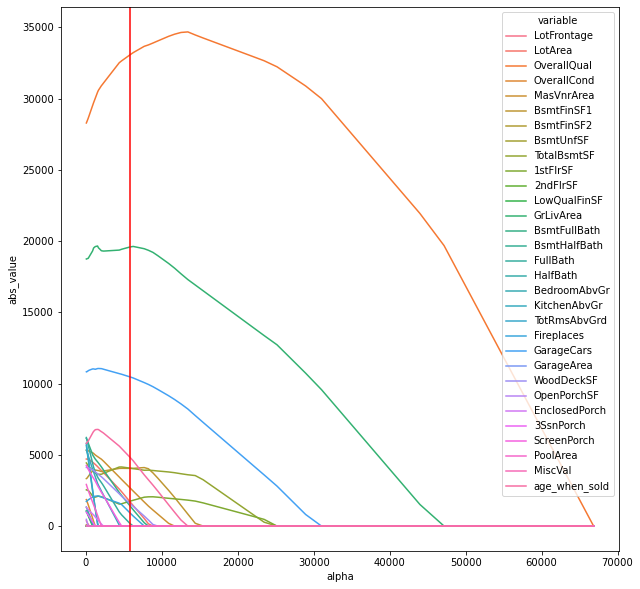

In [22]:
fig, ax = plt.subplots(figsize = (10, 10))
sns.lineplot(data=lasso_path_long, x="alpha", y="abs_value", hue = 'variable')
plt.axvline(las_fit.alpha_, color = 'red')

**Para se aprofundar**: Regressão LARS e Lasso-LARS

https://hastie.su.domains/ElemStatLearn/

### Regressão PLS

A regressão PLS (partial-least squares) é muito semelhante a uma técnica que já utilizamos - a Regressão de Componentes Principais (PCR). Em PCR, utilizamos uma transformação PCA para reduzir a colinearidade das variáveis de entrada e utilizamos os componentes resultantes como variáveis de entrada em uma regressão linear.

Essa técnica tem uma limitação: a transformação PCA não *vê* a variável resposta. PLS é uma técnica que estima simultaneamente os componentes e a regressão linear, criando componentes que representam fatores através dos quais as variáveis de entrada impactam a variável de saída. Ela é muito utilizada nos campos da psicometria e em modelos de NIRS (near-infrared spectroscopy).

**Quando utilizar:** Para construir um modelo compreensível quando temos uma estrutura de correlação entre as variáveis de entrada que nos permita estimar **fatores**, grupos de variáveis de entrada através do qual estas impactam a variável resposta.

**Problemas:** os componentes nem sempre são de fácil interpretação.

**Análogo:** Principal Components Regression (nome chique para *"fazer um PCA seguido de uma regressão"*)

![PLS](PLS.png)

In [25]:
from sklearn.cross_decomposition import PLSRegression


Primeiro vamos utilizar o `clustermap` da Seaborn para analisarmos os agrupamentos de variáveis. Vamos passar para esta função a matriz de correlação das nossas variáveis de forma a agrupar o nosso feature set de acordo com sua estrutura de correlação.

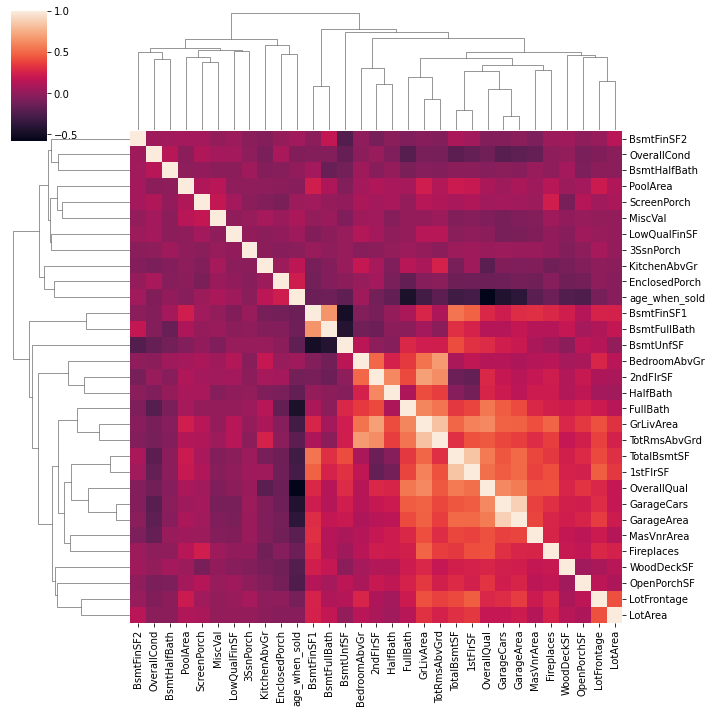

In [26]:
sns.clustermap(X_train.corr())


Para inicializar o método PLS utilizaremos o objeto `PLSRegression`, importado do sub-módulo `sklearn.cross_decomposition`. O único hiper-parâmetro deste objeto é o número de componentes que utilizaremos na camada de fatores. A partir da análise visual escolhi utilizar 5 componentes nesta análise, mas temos outras estratégias para escolher este número:

1. Utilizar uma PCA e avaliar o cotovelo da variância representada por cada componente (scree plot).
1. Utilizar um GridSearchCV para escolher o número de componentes que nos dê o melhor erro de previsão.

O método PLSRegression faz a normalização das variáveis de entrada e saída de maneira automática, então não precisamos nos preocupar com o uso do scaler.

In [27]:
pls_fit = PLSRegression(n_components=5)
pls_fit.fit(X_train, y_train)


PLSRegression(n_components=5)

Primeiro vamos avaliar como cada componente impacta a variável resposta. Vamos utilizar dois gráficos - o primeiro mostrando os coeficientes associados à cada componente e o segundo mostrando o valor absoluto destes coeficientes. Este segundo gráfico evidencia a importância relativa de cada componente - o quanto ele contribui para a previsão do valor de imóvel.

<AxesSubplot:xlabel='componente', ylabel='importancia'>

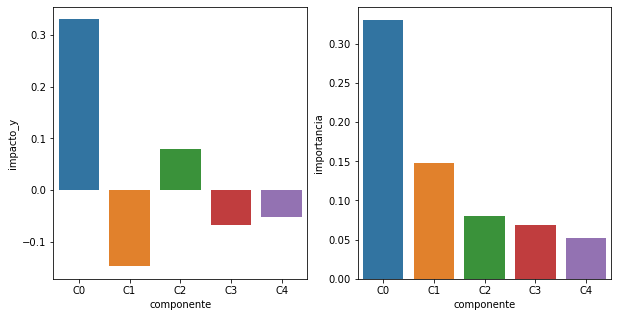

In [28]:
imp_componente = pd.DataFrame(
    pls_fit.y_loadings_.T, index=["C" + str(i) for i in range(5)], columns=["impacto_y"]
)
imp_componente["componente"] = imp_componente.index
imp_componente["importancia"] = abs(imp_componente["impacto_y"])
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
sns.barplot(data=imp_componente, y="impacto_y", x="componente", ax=ax[0])
sns.barplot(data=imp_componente, y="importancia", x="componente", ax=ax[1])


Da mesma forma que extraímos os coeficientes de cada componente em relação à variável resposta podemos extrair os coeficientes da primeira camada - de nossas variáveis de entrada para cada componente. Assim podemos tentar interpretar qualitativamente o que cada componente representa em nosso modelo.

In [29]:
imp_var = pd.DataFrame(
    pls_fit.x_loadings_, index=X_train.columns, columns=["C" + str(i) for i in range(5)]
)
imp_var


,C0,C1,C2,C3,C4
LotFrontage,0.193343,0.274706,-0.180544,-0.129730,0.094244
LotArea,0.146610,0.131601,-0.040785,-0.332772,0.200472
OverallQual,0.310830,-0.255557,0.190789,-0.126620,-0.295070
OverallCond,-0.072149,-0.193494,0.222160,0.061437,0.523816
MasVnrArea,0.211770,-0.062649,-0.054962,0.025416,-0.062044
BsmtFinSF1,0.171826,-0.162994,-0.382928,-0.290747,0.186449
BsmtFinSF2,-0.008439,-0.021257,-0.076242,-0.181387,0.261933
BsmtUnfSF,0.104456,0.171737,0.117461,0.045223,-0.187361
TotalBsmtSF,0.277588,-0.004475,-0.303979,-0.317903,0.097680
1stFlrSF,0.283569,0.087939,-0.272102,-0.349559,0.130686


Como temos muitas variáveis em nosso modelo fica dificil visualizar a relação entre cada uma e cada componente. Vamos fazer um gráfico com as 10 maiores contribuições (o valor absoluto de cada coeficiente) para cada componente e visualizar isto em um gráfico.

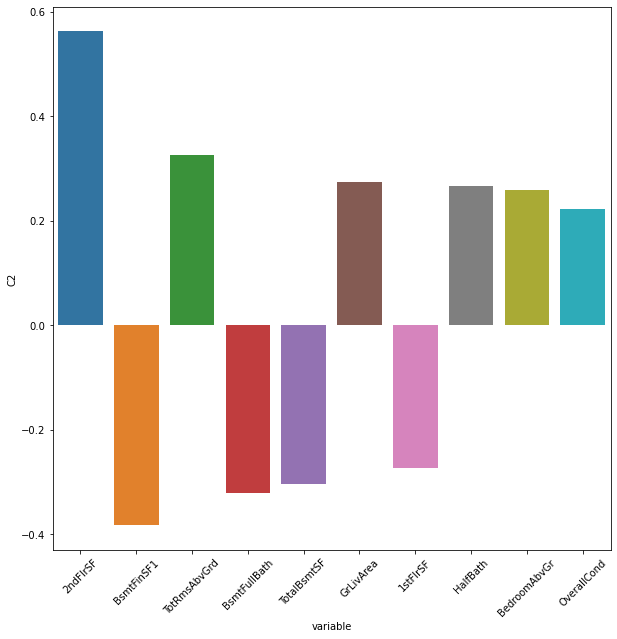

In [35]:
imp_var["variable"] = imp_var.index
fig, ax = plt.subplots(figsize=(10, 10))
component = "C2"
imp_var = imp_var.sort_values(component, ascending=False)
imp_var["abs_comp"] = abs(imp_var[component])
imp_var_sel = imp_var.nlargest(10, "abs_comp")
sns.barplot(data=imp_var_sel, y=component, x="variable")
plt.xticks(rotation=45);

Por fim, vamos mensurar o erro deste modelo.

In [36]:
y_pred = pls_fit.predict(X_test)
from sklearn.metrics import mean_squared_error

print(
    f"Erro de ${round(np.sqrt(mean_squared_error(y_test, y_pred)), 2)} em ${round(np.mean(y_test), 2)}"
)


Erro de $33341.54 em $180640.36


Temos uma melhora comparado à regressão linear e lasso. No entanto estamos estimando um modelo de complexidade maior: a complexidade de qualquer modelo é diretamente relacionada ao número de coeficiente que este tem. Utilizando esta regra percebemos que o Lasso foi nosso modelo mais simples, seguido da regressão linear e por fim do Lasso.

**Para se aprofundar:** 
* Análise de Fatores
    * https://scikit-learn.org/stable/auto_examples/decomposition/plot_varimax_fa.html#sphx-glr-auto-examples-decomposition-plot-varimax-fa-py
    * https://scikit-learn.org/stable/modules/decomposition.html#fa)
    * https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3167872/
* Structural Equation Modelling (SEM)
    * semopy no Python https://semopy.com
    * https://en.wikipedia.org/wiki/Structural_equation_modeling

### Regressão Ridge

Assim como a regressão de lasso, a regressão ridge busca resolver os problemas de colinearidade entre coeficientes e variáveis irrelevantes. No entanto, enquanto o lasso encolhe o coeficiente de algumas variáveis, a regressão ridge encolhe gradualmente todos os coeficientes. Ela é um método ideal para lidar com grandes conjuntos de variáveis, resolvendo automaticamente os problemas de colinearidade e overfitting que podem aconcetecer conforme aumentamos a complexidade de um modelo.

Uma utilização comum é na estimativa de funções não lineares a partir da adição de tranformações polinomiais das variáveis de entrada. Vamos continuar a análise do dataset de housing adicionando uma transformação não-linear bem útil: o beta-spline.

**Quando utilizar:** um método extremamente flexível, capaz de tratar grandes conjuntos de variáveis de forma simples. Sempre que quisermos utilizar transformações complexa para estimar formas funcionais desconhecidas. Muitas vezes apresenta performance superior à métodos bem ma
is complexos como boosting ou redes neurais.

**Problemas:** difícil interpretação do modelo, não captura relações entre variáveis como modelos de Boosting ou redes neurais.

**Análogo:** feature selection onde reduzimos a importancia do conjunto da variáveis para compensar o número de coeficientes sendo estimado.

In [37]:
from sklearn.linear_model import RidgeCV


Olhando apenas a descrição, a regressão de ridge parece identica ao Lasso. Essa impressão não esta completamente incorreta: ambas fazem parte da mesma classe de métodos: **métodos de regularização**. Para entender melhor a diferença de cada uma, vamos começar vendo uma transformação muito útil na construção de modelo preditivos lineares: os splines.

In [38]:
X_ex = pd.DataFrame({"x": np.linspace(0, 10, 100)})
X_ex


,x
0,0.00000
1,0.10101
2,0.20202
3,0.30303
4,0.40404
...,...
95,9.59596
96,9.69697
97,9.79798
98,9.89899


A transformação de spline é uma forma de representar relações não-lineares através de um modelo linear (como a transformação logaritmica). Podemos utilizar essa transformação através do objeto `SplineTransformer`, do sub-módulo `sklearn.preprocessing`.

In [39]:
from sklearn.preprocessing import SplineTransformer


Inicializamos o objeto como os outros transformadores da sklearn. O objeto tem diversos parâmetros que nos permitem controlar quantos splines iremos gerar e qual a complexidade deles. 

In [40]:
spl_trans = SplineTransformer()
spl_trans.fit(X_ex)

SplineTransformer()

In [41]:
spl_trans.transform(X_ex).shape

(100, 7)

Vamos utilizar o método `transform` para construir um DataFrame com os resultados da transformação.

In [42]:
X_ex_spl = pd.DataFrame(
    spl_trans.transform(X_ex),
    columns=["S" + str(i) for i in range(spl_trans.n_features_out_)],
)
X_ex_spl["x"] = X_ex["x"]


Agora vamos visualizar a transformação comparando cada spline gerada com o valor original.

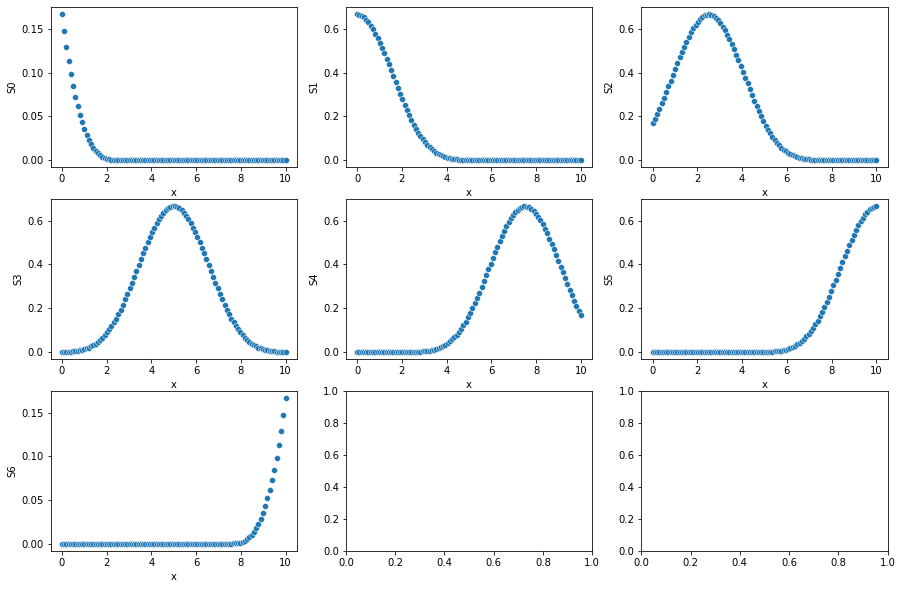

In [43]:
fig, ax = plt.subplots(3, 3, figsize=(15, 10))
sp = 0
for i in range(3):
    for j in range(3):
        try:
            sns.scatterplot(data=X_ex_spl, x="x", y="S" + str(sp), ax=ax[i][j])
        except ValueError:
            continue
        sp += 1


Os splines funcionam como **um tipo de variável dummy continua**: ao invés de serem simplesmente binários, representam de maneira continua os pontos onde nossa variável X assume certos valores. Por exemplo, quando X = 10, os 4 primeiros splines (de 0 à 3) tem valor 0. Os 3 seguintes tem valores crescentes. **Quando inserimos isso em uma regressão estimamos efeitos locais**: o os splines 4, 5 e 6 conterão os efeitos da variável X sobre nossa variável resposta apenas quando X tem um valor alto!

Os métodos de ridge regression existem para tratar desse tipo de transformação: quando utilizamos um spline, como no exemplo acima, multiplicamos o número de variáveis que estamos inserindo em nosso modelo. Para controlar essa explosão de complexidade o ridge regression penaliza os coeficientes de forma conjunta, ao contrário do lasso, que penaliza cada coeficiente individualmente. Vamos ver isso na prática. Primeiro iremos treinar nossos splines.

In [54]:
spl_house = SplineTransformer(degree = 5)
spl_house.fit(scaler.transform(X_train))


SplineTransformer()

Agora vamos utilizar o método `RidgeCV`, do sub-módulo `sklearn.linear_models`. Assim como no Lasso, o único parâmetro que devemos especificar é o `cv`. Utilizaremos nossas splines como features de entrada, passando o DataFrame `X_train` através do `scaler` e do `spl_house` antes de alimenta-lo ao `fit`.

In [55]:
rid_fit = RidgeCV(cv = 5)
rid_fit.fit(spl_house.transform(scaler.transform(X_train)), y_train)


RidgeCV(alphas=array([ 0.1,  1. , 10. ]), cv=5)

In [58]:
from sklearn.metrics import mean_squared_error
for i in range(1, 25):
    spl_house = SplineTransformer(degree = i)
    spl_house.fit(scaler.transform(X_train))
    rid_fit = RidgeCV(cv = 5)
    rid_fit.fit(spl_house.transform(scaler.transform(X_train)), y_train)
    y_pred = rid_fit.predict(spl_house.transform(scaler.transform(X_test)))
    print(
        f"Erro de ${round(np.sqrt(mean_squared_error(y_test, y_pred)), 2)} em ${round(np.mean(y_test), 2)}"
    )


Erro de $28568.46 em $180640.36
Erro de $28311.82 em $180640.36
Erro de $28259.11 em $180640.36
Erro de $28326.14 em $180640.36
Erro de $28459.99 em $180640.36
Erro de $28034.53 em $180640.36
Erro de $27775.43 em $180640.36
Erro de $27766.14 em $180640.36
Erro de $27699.11 em $180640.36
Erro de $27692.72 em $180640.36
Erro de $27687.78 em $180640.36
Erro de $27699.97 em $180640.36
Erro de $27717.5 em $180640.36
Erro de $27741.05 em $180640.36
Erro de $27767.84 em $180640.36
Erro de $27797.39 em $180640.36
Erro de $27829.06 em $180640.36
Erro de $27862.76 em $180640.36
Erro de $27898.46 em $180640.36
Erro de $27936.31 em $180640.36
Erro de $27976.46 em $180640.36
Erro de $28019.08 em $180640.36
Erro de $28064.29 em $180640.36
Erro de $28112.2 em $180640.36


Como podemos ver, mesmo adicionando inúmeros features não sofremos com overfitting. Essa é a principal qualidade do ridge regression, a capacidade de lidar com features criados através de transformações não lineares sem (muito) risco de overfitting.

Vamos comparar isto com uma regressão linear que utiliza os mesmos splines como features de entrada.

In [47]:
lin_spline_fit = LinearRegression()
lin_spline_fit.fit(spl_house.transform(scaler.transform(X_train)), y_train)
y_pred = lin_spline_fit.predict(spl_house.transform(scaler.transform(X_test)))
from sklearn.metrics import mean_squared_error

print(
    f"Erro de ${round(np.sqrt(mean_squared_error(y_test, y_pred)), 2)} em ${round(np.mean(y_test), 2)}"
)

Erro de $94418043897.12 em $180640.36


**Para se aprofundar** A regressão ElasticNet, que combina o Lasso com o Ridge.

## Métodos Não-Lineares
Embora os métodos lineares tenham vantagens claras (simplicidade, velocidade de implantação e interpretabilidade), em diversos problemas conseguimos uma performance preditiva melhor utilizando métodos não-lineares. Enquanto métodos lineares **sempre partem de uma função conhecida**, a da regressão linear, métodos não-lineares **não tem uma função conhecida prévia**: estimar esta função é *parte do trabalho do algoritmo*. Todos os classificadores que vimos dentro da SKLEARN até agora tem um regressor equivalente (árvores de decisão, kNN e métodos de ensemble) que podemos instanciar trocando o sufixo `Classifier` por `Regressor` (por exemplo, de `DecisionTreeClassifier` para `DecisionTreeRegressor`).

Sendo assim vamos comparar a performance do regressor de Floresta Aleatória, `RandomForestRegressor` (equivalente ao `RandomForestClassifier`) da sklearn com as regressões que fizemos até agora e aprender um método de outra biblioteca que representa o estado da arte em métodos de Machine Learning.

### Regressor de Floresta Aleatória

In [59]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

In [60]:
rfr_fit = RandomForestRegressor()
rfr_fit.fit(scaler.transform(X_train), y_train)

RandomForestRegressor()

In [61]:
y_pred = rfr_fit.predict(scaler.transform(X_test))
from sklearn.metrics import mean_squared_error

print(
    f"Erro de ${round(np.sqrt(mean_squared_error(y_test, y_pred)), 2)} em ${round(np.mean(y_test), 2)}"
)

Erro de $31128.23 em $180640.36


In [69]:
max_depth = [1, 2, 4, 8, 16, 32]
n_estimators = [100, 200, 400, 800, 1600, 3200]
param_grid = {
    'max_depth': max_depth,
    'n_estimators': n_estimators
}

rfr_fit = RandomForestRegressor()
clf_fit = GridSearchCV(rfr_fit, param_grid, n_jobs = -1)
clf_fit.fit(scaler.transform(X_train), y_train)

GridSearchCV(estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'max_depth': [1, 2, 4, 8, 16, 32],
                         'n_estimators': [100, 200, 400, 800, 1600, 3200]})

In [70]:
y_pred = clf_fit.predict(scaler.transform(X_test))
from sklearn.metrics import mean_squared_error

print(
    f"Erro de ${round(np.sqrt(mean_squared_error(y_test, y_pred)), 2)} em ${round(np.mean(y_test), 2)}"
)

Erro de $31699.37 em $180640.36


In [ ]:
clf_fit.best_params_

### catboost

In [62]:
import catboost as cat

In [63]:
cat_fit = cat.CatBoostRegressor()
cat_fit.fit(scaler.transform(X_train), y_train)

Learning rate set to 0.038719
0:	learn: 81365.9255768	total: 62.6ms	remaining: 1m 2s
1:	learn: 79490.0282424	total: 64.3ms	remaining: 32.1s
2:	learn: 77613.3270645	total: 65.6ms	remaining: 21.8s
3:	learn: 75828.7288319	total: 66.7ms	remaining: 16.6s
4:	learn: 74076.3785754	total: 68.4ms	remaining: 13.6s
5:	learn: 72430.7540543	total: 70.9ms	remaining: 11.8s
6:	learn: 70682.4983377	total: 73.1ms	remaining: 10.4s
7:	learn: 68959.2707406	total: 75.7ms	remaining: 9.39s
8:	learn: 67552.4541612	total: 77.6ms	remaining: 8.54s
9:	learn: 65963.4991578	total: 79.2ms	remaining: 7.84s
10:	learn: 64460.6539637	total: 80.7ms	remaining: 7.26s
11:	learn: 63099.1499650	total: 82ms	remaining: 6.75s
12:	learn: 61831.0956139	total: 83.7ms	remaining: 6.36s
13:	learn: 60510.9455691	total: 85ms	remaining: 5.98s
14:	learn: 59292.6630287	total: 87.1ms	remaining: 5.72s
15:	learn: 58200.6674767	total: 88.5ms	remaining: 5.44s
16:	learn: 57106.7768425	total: 89.5ms	remaining: 5.18s
17:	learn: 55979.7908105	total: 

229:	learn: 17577.6681727	total: 381ms	remaining: 1.27s
230:	learn: 17562.5713019	total: 382ms	remaining: 1.27s
231:	learn: 17532.5986642	total: 385ms	remaining: 1.27s
232:	learn: 17524.2630173	total: 386ms	remaining: 1.27s
233:	learn: 17518.8751314	total: 388ms	remaining: 1.27s
234:	learn: 17492.2403603	total: 389ms	remaining: 1.27s
235:	learn: 17474.5398934	total: 390ms	remaining: 1.26s
236:	learn: 17448.4762922	total: 391ms	remaining: 1.26s
237:	learn: 17406.3623894	total: 393ms	remaining: 1.26s
238:	learn: 17401.4711602	total: 393ms	remaining: 1.25s
239:	learn: 17362.4925094	total: 395ms	remaining: 1.25s
240:	learn: 17325.1256242	total: 396ms	remaining: 1.25s
241:	learn: 17274.4504371	total: 398ms	remaining: 1.25s
242:	learn: 17241.7402168	total: 399ms	remaining: 1.24s
243:	learn: 17219.9232648	total: 400ms	remaining: 1.24s
244:	learn: 17182.4007878	total: 402ms	remaining: 1.24s
245:	learn: 17145.6521506	total: 404ms	remaining: 1.24s
246:	learn: 17132.0838761	total: 405ms	remaining

486:	learn: 12212.4133615	total: 764ms	remaining: 805ms
487:	learn: 12210.8947692	total: 766ms	remaining: 804ms
488:	learn: 12209.4448653	total: 768ms	remaining: 802ms
489:	learn: 12203.6709796	total: 770ms	remaining: 801ms
490:	learn: 12182.2699770	total: 771ms	remaining: 799ms
491:	learn: 12180.8466040	total: 772ms	remaining: 797ms
492:	learn: 12171.7629613	total: 773ms	remaining: 795ms
493:	learn: 12170.4108876	total: 775ms	remaining: 794ms
494:	learn: 12151.2985818	total: 776ms	remaining: 792ms
495:	learn: 12128.3012569	total: 778ms	remaining: 790ms
496:	learn: 12111.7835326	total: 780ms	remaining: 790ms
497:	learn: 12100.7146080	total: 782ms	remaining: 788ms
498:	learn: 12080.7952725	total: 783ms	remaining: 786ms
499:	learn: 12069.9184599	total: 785ms	remaining: 785ms
500:	learn: 12054.5783168	total: 786ms	remaining: 783ms
501:	learn: 12041.7396399	total: 787ms	remaining: 781ms
502:	learn: 12021.8914443	total: 789ms	remaining: 779ms
503:	learn: 12006.8579538	total: 790ms	remaining

636:	learn: 10171.7526573	total: 957ms	remaining: 545ms
637:	learn: 10157.6924971	total: 958ms	remaining: 544ms
638:	learn: 10140.9400553	total: 960ms	remaining: 542ms
639:	learn: 10129.5329811	total: 961ms	remaining: 541ms
640:	learn: 10119.4480559	total: 963ms	remaining: 539ms
641:	learn: 10111.0888886	total: 964ms	remaining: 538ms
642:	learn: 10102.8007462	total: 966ms	remaining: 536ms
643:	learn: 10101.9949830	total: 967ms	remaining: 535ms
644:	learn: 10095.7956770	total: 969ms	remaining: 533ms
645:	learn: 10087.5047071	total: 970ms	remaining: 532ms
646:	learn: 10082.0343731	total: 971ms	remaining: 530ms
647:	learn: 10067.7039759	total: 973ms	remaining: 528ms
648:	learn: 10048.4916229	total: 975ms	remaining: 527ms
649:	learn: 10033.9168322	total: 976ms	remaining: 525ms
650:	learn: 10018.1287009	total: 978ms	remaining: 524ms
651:	learn: 9998.0270762	total: 980ms	remaining: 523ms
652:	learn: 9981.1777240	total: 982ms	remaining: 522ms
653:	learn: 9967.9593919	total: 984ms	remaining: 5

818:	learn: 8380.7683186	total: 1.34s	remaining: 296ms
819:	learn: 8365.9353118	total: 1.34s	remaining: 295ms
820:	learn: 8354.0836686	total: 1.34s	remaining: 293ms
821:	learn: 8341.9779483	total: 1.35s	remaining: 292ms
822:	learn: 8328.2969762	total: 1.35s	remaining: 290ms
823:	learn: 8314.4798182	total: 1.35s	remaining: 289ms
824:	learn: 8301.8825844	total: 1.36s	remaining: 288ms
825:	learn: 8294.9350773	total: 1.36s	remaining: 287ms
826:	learn: 8286.2286277	total: 1.36s	remaining: 285ms
827:	learn: 8283.8731438	total: 1.36s	remaining: 283ms
828:	learn: 8263.9011252	total: 1.36s	remaining: 282ms
829:	learn: 8257.3507545	total: 1.37s	remaining: 280ms
830:	learn: 8244.3844822	total: 1.37s	remaining: 278ms
831:	learn: 8227.8416351	total: 1.37s	remaining: 278ms
832:	learn: 8224.1082701	total: 1.38s	remaining: 276ms
833:	learn: 8214.4984570	total: 1.38s	remaining: 274ms
834:	learn: 8213.9548768	total: 1.38s	remaining: 273ms
835:	learn: 8212.3014407	total: 1.38s	remaining: 271ms
836:	learn

In [64]:
y_pred = cat_fit.predict(scaler.transform(X_test))
from sklearn.metrics import mean_squared_error

print(
    f"Erro de ${round(np.sqrt(mean_squared_error(y_test, y_pred)), 2)} em ${round(np.mean(y_test), 2)}"
)

Erro de $26138.78 em $180640.36


In [67]:
cat_fit = cat.CatBoostRegressor(iterations = 20000, depth = 8, od_type = "Iter", od_wait = 500)
cat_fit.fit(scaler.transform(X_train), y_train, eval_set = (scaler.transform(X_test), y_test))

Learning rate set to 0.007067
0:	learn: 83040.9401310	test: 81635.7353080	best: 81635.7353080 (0)	total: 8.92ms	remaining: 2m 58s
1:	learn: 82669.8928730	test: 81286.0080886	best: 81286.0080886 (1)	total: 12.9ms	remaining: 2m 8s
2:	learn: 82299.4910032	test: 80946.1382967	best: 80946.1382967 (2)	total: 17.3ms	remaining: 1m 55s
3:	learn: 81932.4562016	test: 80564.5425150	best: 80564.5425150 (3)	total: 21.3ms	remaining: 1m 46s
4:	learn: 81582.1324254	test: 80253.4002101	best: 80253.4002101 (4)	total: 25.3ms	remaining: 1m 41s
5:	learn: 81200.5019790	test: 79853.7521510	best: 79853.7521510 (5)	total: 28.6ms	remaining: 1m 35s
6:	learn: 80877.7183383	test: 79516.2346096	best: 79516.2346096 (6)	total: 32.1ms	remaining: 1m 31s
7:	learn: 80521.9672977	test: 79177.8460728	best: 79177.8460728 (7)	total: 35.6ms	remaining: 1m 29s
8:	learn: 80166.3016591	test: 78832.1081020	best: 78832.1081020 (8)	total: 38.3ms	remaining: 1m 25s
9:	learn: 79846.6515667	test: 78538.5760121	best: 78538.5760121 (9)	tot

128:	learn: 50389.0493115	test: 49841.1343449	best: 49841.1343449 (128)	total: 378ms	remaining: 58.2s
129:	learn: 50236.2700192	test: 49732.6862201	best: 49732.6862201 (129)	total: 380ms	remaining: 58.1s
130:	learn: 50072.2984532	test: 49618.2114601	best: 49618.2114601 (130)	total: 382ms	remaining: 58s
131:	learn: 49921.7395773	test: 49493.8828953	best: 49493.8828953 (131)	total: 385ms	remaining: 57.9s
132:	learn: 49758.6447600	test: 49369.8776007	best: 49369.8776007 (132)	total: 387ms	remaining: 57.8s
133:	learn: 49582.2542591	test: 49205.9827266	best: 49205.9827266 (133)	total: 390ms	remaining: 57.8s
134:	learn: 49423.5622317	test: 49073.0519895	best: 49073.0519895 (134)	total: 395ms	remaining: 58.1s
135:	learn: 49277.7932692	test: 48939.9752983	best: 48939.9752983 (135)	total: 398ms	remaining: 58.1s
136:	learn: 49121.6678032	test: 48772.1121245	best: 48772.1121245 (136)	total: 401ms	remaining: 58.1s
137:	learn: 48972.8913492	test: 48639.0716211	best: 48639.0716211 (137)	total: 404ms

239:	learn: 36460.0172842	test: 38343.4697578	best: 38343.4697578 (239)	total: 763ms	remaining: 1m 2s
240:	learn: 36372.1306148	test: 38262.3755410	best: 38262.3755410 (240)	total: 765ms	remaining: 1m 2s
241:	learn: 36281.2664541	test: 38198.5551122	best: 38198.5551122 (241)	total: 768ms	remaining: 1m 2s
242:	learn: 36202.3070020	test: 38141.7830628	best: 38141.7830628 (242)	total: 770ms	remaining: 1m 2s
243:	learn: 36109.9785649	test: 38076.7034469	best: 38076.7034469 (243)	total: 774ms	remaining: 1m 2s
244:	learn: 36025.3633568	test: 38014.1159096	best: 38014.1159096 (244)	total: 777ms	remaining: 1m 2s
245:	learn: 35949.0287942	test: 37952.9280023	best: 37952.9280023 (245)	total: 780ms	remaining: 1m 2s
246:	learn: 35866.1464766	test: 37889.1982026	best: 37889.1982026 (246)	total: 784ms	remaining: 1m 2s
247:	learn: 35774.3559364	test: 37830.7033552	best: 37830.7033552 (247)	total: 787ms	remaining: 1m 2s
248:	learn: 35692.2088170	test: 37777.8122062	best: 37777.8122062 (248)	total: 790

364:	learn: 28033.0700095	test: 32681.4376295	best: 32681.4376295 (364)	total: 1.14s	remaining: 1m 1s
365:	learn: 27986.7193426	test: 32649.4502218	best: 32649.4502218 (365)	total: 1.15s	remaining: 1m 1s
366:	learn: 27929.4504774	test: 32631.0880320	best: 32631.0880320 (366)	total: 1.15s	remaining: 1m 1s
367:	learn: 27878.2457716	test: 32587.5143410	best: 32587.5143410 (367)	total: 1.15s	remaining: 1m 1s
368:	learn: 27833.5304867	test: 32560.0880480	best: 32560.0880480 (368)	total: 1.15s	remaining: 1m 1s
369:	learn: 27781.4031800	test: 32544.7204096	best: 32544.7204096 (369)	total: 1.16s	remaining: 1m 1s
370:	learn: 27738.6496292	test: 32507.0840174	best: 32507.0840174 (370)	total: 1.16s	remaining: 1m 1s
371:	learn: 27697.8157883	test: 32478.5550989	best: 32478.5550989 (371)	total: 1.16s	remaining: 1m 1s
372:	learn: 27654.6295592	test: 32448.0000071	best: 32448.0000071 (372)	total: 1.17s	remaining: 1m 1s
373:	learn: 27607.2056688	test: 32430.4176291	best: 32430.4176291 (373)	total: 1.1

505:	learn: 22977.3201235	test: 29735.8147952	best: 29735.8147952 (505)	total: 1.53s	remaining: 58.9s
506:	learn: 22947.7760709	test: 29705.5165175	best: 29705.5165175 (506)	total: 1.53s	remaining: 58.9s
507:	learn: 22927.9282264	test: 29682.9065395	best: 29682.9065395 (507)	total: 1.53s	remaining: 58.8s
508:	learn: 22901.8150267	test: 29657.1955360	best: 29657.1955360 (508)	total: 1.54s	remaining: 58.8s
509:	learn: 22879.9304856	test: 29639.9495226	best: 29639.9495226 (509)	total: 1.54s	remaining: 58.8s
510:	learn: 22850.8396608	test: 29627.6347456	best: 29627.6347456 (510)	total: 1.54s	remaining: 58.8s
511:	learn: 22827.0989653	test: 29615.5946570	best: 29615.5946570 (511)	total: 1.54s	remaining: 58.8s
512:	learn: 22799.8209776	test: 29608.7361735	best: 29608.7361735 (512)	total: 1.55s	remaining: 58.8s
513:	learn: 22775.3175229	test: 29598.3770997	best: 29598.3770997 (513)	total: 1.55s	remaining: 58.9s
514:	learn: 22752.1937379	test: 29584.6608514	best: 29584.6608514 (514)	total: 1.5

647:	learn: 20181.5510543	test: 28331.7879296	best: 28331.7879296 (647)	total: 1.91s	remaining: 57.1s
648:	learn: 20167.1764859	test: 28328.5499967	best: 28328.5499967 (648)	total: 1.91s	remaining: 57.1s
649:	learn: 20150.5902692	test: 28322.0365383	best: 28322.0365383 (649)	total: 1.92s	remaining: 57.1s
650:	learn: 20133.7687205	test: 28314.0219975	best: 28314.0219975 (650)	total: 1.92s	remaining: 57.1s
651:	learn: 20115.4616381	test: 28298.9063324	best: 28298.9063324 (651)	total: 1.92s	remaining: 57.1s
652:	learn: 20096.0343899	test: 28290.4847050	best: 28290.4847050 (652)	total: 1.93s	remaining: 57.1s
653:	learn: 20081.5595598	test: 28283.4503419	best: 28283.4503419 (653)	total: 1.93s	remaining: 57.1s
654:	learn: 20063.0522401	test: 28273.3191196	best: 28273.3191196 (654)	total: 1.93s	remaining: 57.1s
655:	learn: 20046.3604622	test: 28264.7103672	best: 28264.7103672 (655)	total: 1.94s	remaining: 57.1s
656:	learn: 20032.3493780	test: 28250.9772027	best: 28250.9772027 (656)	total: 1.9

791:	learn: 18400.5214794	test: 27535.7650591	best: 27534.5588270 (790)	total: 2.29s	remaining: 55.6s
792:	learn: 18389.9168304	test: 27532.8694718	best: 27532.8694718 (792)	total: 2.3s	remaining: 55.6s
793:	learn: 18380.1936071	test: 27529.7948756	best: 27529.7948756 (793)	total: 2.3s	remaining: 55.6s
794:	learn: 18371.5519869	test: 27523.2896149	best: 27523.2896149 (794)	total: 2.3s	remaining: 55.6s
795:	learn: 18363.3435134	test: 27517.1536024	best: 27517.1536024 (795)	total: 2.31s	remaining: 55.6s
796:	learn: 18356.5180077	test: 27515.5311196	best: 27515.5311196 (796)	total: 2.31s	remaining: 55.6s
797:	learn: 18345.5236458	test: 27510.8253077	best: 27510.8253077 (797)	total: 2.31s	remaining: 55.6s
798:	learn: 18337.1698309	test: 27506.4103614	best: 27506.4103614 (798)	total: 2.31s	remaining: 55.6s
799:	learn: 18327.1295566	test: 27504.4418413	best: 27504.4418413 (799)	total: 2.32s	remaining: 55.6s
800:	learn: 18316.8047774	test: 27500.1953268	best: 27500.1953268 (800)	total: 2.32s	

931:	learn: 17105.5252688	test: 27022.4839677	best: 27022.4839677 (931)	total: 2.67s	remaining: 54.7s
932:	learn: 17098.0967984	test: 27021.4033864	best: 27021.4033864 (932)	total: 2.68s	remaining: 54.7s
933:	learn: 17090.3068530	test: 27017.1833430	best: 27017.1833430 (933)	total: 2.68s	remaining: 54.7s
934:	learn: 17081.4013516	test: 27016.4511435	best: 27016.4511435 (934)	total: 2.68s	remaining: 54.7s
935:	learn: 17072.5259761	test: 27012.4997979	best: 27012.4997979 (935)	total: 2.69s	remaining: 54.7s
936:	learn: 17064.6335900	test: 27007.8863651	best: 27007.8863651 (936)	total: 2.69s	remaining: 54.7s
937:	learn: 17060.6640169	test: 27006.5590369	best: 27006.5590369 (937)	total: 2.69s	remaining: 54.7s
938:	learn: 17051.8808884	test: 27006.2691038	best: 27006.2691038 (938)	total: 2.69s	remaining: 54.7s
939:	learn: 17041.2233901	test: 26998.3136598	best: 26998.3136598 (939)	total: 2.7s	remaining: 54.7s
940:	learn: 17031.3145889	test: 26993.7142288	best: 26993.7142288 (940)	total: 2.7s

1082:	learn: 16014.5811854	test: 26669.7399750	best: 26665.7679216 (1078)	total: 3.06s	remaining: 53.4s
1083:	learn: 16013.1878373	test: 26669.7061686	best: 26665.7679216 (1078)	total: 3.06s	remaining: 53.4s
1084:	learn: 16002.3665075	test: 26667.3600484	best: 26665.7679216 (1078)	total: 3.06s	remaining: 53.4s
1085:	learn: 15997.6014938	test: 26665.5119604	best: 26665.5119604 (1085)	total: 3.06s	remaining: 53.4s
1086:	learn: 15991.3470243	test: 26659.7944530	best: 26659.7944530 (1086)	total: 3.07s	remaining: 53.4s
1087:	learn: 15986.3999420	test: 26656.7274540	best: 26656.7274540 (1087)	total: 3.07s	remaining: 53.3s
1088:	learn: 15980.7803131	test: 26655.7661226	best: 26655.7661226 (1088)	total: 3.07s	remaining: 53.3s
1089:	learn: 15976.7348120	test: 26654.3313661	best: 26654.3313661 (1089)	total: 3.07s	remaining: 53.3s
1090:	learn: 15975.2398767	test: 26653.5342818	best: 26653.5342818 (1090)	total: 3.08s	remaining: 53.3s
1091:	learn: 15965.8485654	test: 26651.0327684	best: 26651.03276

1240:	learn: 15043.8494861	test: 26407.6290276	best: 26407.6290276 (1240)	total: 3.44s	remaining: 52s
1241:	learn: 15034.7134365	test: 26410.4268301	best: 26407.6290276 (1240)	total: 3.44s	remaining: 52s
1242:	learn: 15023.5707272	test: 26406.0651651	best: 26406.0651651 (1242)	total: 3.45s	remaining: 52s
1243:	learn: 15022.2837695	test: 26407.7709460	best: 26406.0651651 (1242)	total: 3.45s	remaining: 52s
1244:	learn: 15013.9413197	test: 26405.8852929	best: 26405.8852929 (1244)	total: 3.45s	remaining: 52s
1245:	learn: 15009.4206737	test: 26405.2442157	best: 26405.2442157 (1245)	total: 3.46s	remaining: 52s
1246:	learn: 15001.8548951	test: 26403.8824019	best: 26403.8824019 (1246)	total: 3.46s	remaining: 52s
1247:	learn: 14996.8690389	test: 26402.0470084	best: 26402.0470084 (1247)	total: 3.46s	remaining: 52s
1248:	learn: 14989.5263804	test: 26402.1105489	best: 26402.0470084 (1247)	total: 3.46s	remaining: 52s
1249:	learn: 14987.5642443	test: 26400.5941430	best: 26400.5941430 (1249)	total: 3

1387:	learn: 14251.6631947	test: 26245.8277816	best: 26245.8277816 (1387)	total: 3.83s	remaining: 51.3s
1388:	learn: 14247.3640801	test: 26245.9063655	best: 26245.8277816 (1387)	total: 3.83s	remaining: 51.3s
1389:	learn: 14238.9157010	test: 26245.8577224	best: 26245.8277816 (1387)	total: 3.83s	remaining: 51.3s
1390:	learn: 14233.0599866	test: 26243.6439992	best: 26243.6439992 (1390)	total: 3.84s	remaining: 51.3s
1391:	learn: 14229.6535952	test: 26241.7607693	best: 26241.7607693 (1391)	total: 3.84s	remaining: 51.3s
1392:	learn: 14226.4555265	test: 26240.6252450	best: 26240.6252450 (1392)	total: 3.84s	remaining: 51.3s
1393:	learn: 14219.1665303	test: 26237.8268638	best: 26237.8268638 (1393)	total: 3.84s	remaining: 51.3s
1394:	learn: 14211.1733938	test: 26234.9992454	best: 26234.9992454 (1394)	total: 3.85s	remaining: 51.3s
1395:	learn: 14207.9354128	test: 26230.4434814	best: 26230.4434814 (1395)	total: 3.85s	remaining: 51.3s
1396:	learn: 14200.0514050	test: 26229.0702144	best: 26229.07021

1529:	learn: 13529.4629060	test: 26148.7257072	best: 26148.7257072 (1529)	total: 4.21s	remaining: 50.8s
1530:	learn: 13522.4471050	test: 26149.8215209	best: 26148.7257072 (1529)	total: 4.21s	remaining: 50.8s
1531:	learn: 13521.6569838	test: 26149.3558418	best: 26148.7257072 (1529)	total: 4.21s	remaining: 50.8s
1532:	learn: 13521.0974169	test: 26149.6500228	best: 26148.7257072 (1529)	total: 4.21s	remaining: 50.8s
1533:	learn: 13516.3488807	test: 26150.6263279	best: 26148.7257072 (1529)	total: 4.22s	remaining: 50.8s
1534:	learn: 13510.9446304	test: 26149.7916699	best: 26148.7257072 (1529)	total: 4.22s	remaining: 50.8s
1535:	learn: 13504.7375736	test: 26149.2211055	best: 26148.7257072 (1529)	total: 4.22s	remaining: 50.7s
1536:	learn: 13498.4835147	test: 26151.5394603	best: 26148.7257072 (1529)	total: 4.22s	remaining: 50.7s
1537:	learn: 13490.6358393	test: 26153.5862581	best: 26148.7257072 (1529)	total: 4.23s	remaining: 50.7s
1538:	learn: 13486.5489571	test: 26152.8556286	best: 26148.72570

1675:	learn: 12840.1946731	test: 26095.1905704	best: 26095.0226406 (1671)	total: 4.59s	remaining: 50.2s
1676:	learn: 12837.3737051	test: 26094.7434264	best: 26094.7434264 (1676)	total: 4.6s	remaining: 50.2s
1677:	learn: 12830.0032441	test: 26091.0263050	best: 26091.0263050 (1677)	total: 4.6s	remaining: 50.2s
1678:	learn: 12821.4728397	test: 26091.7650847	best: 26091.0263050 (1677)	total: 4.6s	remaining: 50.2s
1679:	learn: 12815.1556727	test: 26088.9085641	best: 26088.9085641 (1679)	total: 4.61s	remaining: 50.2s
1680:	learn: 12808.9072297	test: 26085.7312812	best: 26085.7312812 (1680)	total: 4.61s	remaining: 50.3s
1681:	learn: 12805.8312639	test: 26086.2650838	best: 26085.7312812 (1680)	total: 4.61s	remaining: 50.3s
1682:	learn: 12801.1098328	test: 26085.4756441	best: 26085.4756441 (1682)	total: 4.62s	remaining: 50.3s
1683:	learn: 12794.0104011	test: 26085.9428007	best: 26085.4756441 (1682)	total: 4.62s	remaining: 50.3s
1684:	learn: 12789.1915370	test: 26086.8585996	best: 26085.4756441 

1806:	learn: 12193.7832424	test: 26020.6352944	best: 26020.6352944 (1806)	total: 4.98s	remaining: 50.1s
1807:	learn: 12190.4780514	test: 26019.8473959	best: 26019.8473959 (1807)	total: 4.98s	remaining: 50.1s
1808:	learn: 12187.7841319	test: 26020.5838734	best: 26019.8473959 (1807)	total: 4.98s	remaining: 50.1s
1809:	learn: 12187.3925876	test: 26021.6670991	best: 26019.8473959 (1807)	total: 4.99s	remaining: 50.1s
1810:	learn: 12184.0439977	test: 26021.7592014	best: 26019.8473959 (1807)	total: 4.99s	remaining: 50.1s
1811:	learn: 12180.5488923	test: 26018.6395533	best: 26018.6395533 (1811)	total: 4.99s	remaining: 50.1s
1812:	learn: 12178.2741244	test: 26019.2578110	best: 26018.6395533 (1811)	total: 5s	remaining: 50.1s
1813:	learn: 12174.1838490	test: 26017.9826595	best: 26017.9826595 (1813)	total: 5s	remaining: 50.1s
1814:	learn: 12172.0183863	test: 26018.4659752	best: 26017.9826595 (1813)	total: 5s	remaining: 50.1s
1815:	learn: 12169.6521310	test: 26018.3539789	best: 26017.9826595 (1813)

1957:	learn: 11569.8990443	test: 25982.8164877	best: 25979.4580188 (1955)	total: 5.37s	remaining: 49.5s
1958:	learn: 11564.3563386	test: 25984.0981431	best: 25979.4580188 (1955)	total: 5.37s	remaining: 49.5s
1959:	learn: 11560.0424674	test: 25983.6222573	best: 25979.4580188 (1955)	total: 5.38s	remaining: 49.5s
1960:	learn: 11555.6426491	test: 25983.0648790	best: 25979.4580188 (1955)	total: 5.38s	remaining: 49.5s
1961:	learn: 11555.2743281	test: 25983.0685969	best: 25979.4580188 (1955)	total: 5.38s	remaining: 49.5s
1962:	learn: 11549.4778680	test: 25982.9525071	best: 25979.4580188 (1955)	total: 5.38s	remaining: 49.5s
1963:	learn: 11548.5094973	test: 25983.0241642	best: 25979.4580188 (1955)	total: 5.38s	remaining: 49.5s
1964:	learn: 11544.1224166	test: 25982.9107437	best: 25979.4580188 (1955)	total: 5.39s	remaining: 49.5s
1965:	learn: 11540.4597463	test: 25982.5557949	best: 25979.4580188 (1955)	total: 5.39s	remaining: 49.5s
1966:	learn: 11535.4108777	test: 25988.0917484	best: 25979.45801

2102:	learn: 10990.2623355	test: 25956.1607636	best: 25955.1012852 (2099)	total: 5.75s	remaining: 49s
2103:	learn: 10987.4862495	test: 25956.5730463	best: 25955.1012852 (2099)	total: 5.75s	remaining: 49s
2104:	learn: 10987.2108436	test: 25957.6076313	best: 25955.1012852 (2099)	total: 5.76s	remaining: 48.9s
2105:	learn: 10983.5475361	test: 25958.1704001	best: 25955.1012852 (2099)	total: 5.76s	remaining: 48.9s
2106:	learn: 10976.6957363	test: 25957.3794458	best: 25955.1012852 (2099)	total: 5.76s	remaining: 48.9s
2107:	learn: 10972.4392533	test: 25957.5231142	best: 25955.1012852 (2099)	total: 5.77s	remaining: 48.9s
2108:	learn: 10972.0446376	test: 25957.2642879	best: 25955.1012852 (2099)	total: 5.77s	remaining: 48.9s
2109:	learn: 10971.7187402	test: 25958.0652317	best: 25955.1012852 (2099)	total: 5.77s	remaining: 48.9s
2110:	learn: 10971.1237844	test: 25957.8285554	best: 25955.1012852 (2099)	total: 5.77s	remaining: 48.9s
2111:	learn: 10969.1184452	test: 25956.0363688	best: 25955.1012852 (

2248:	learn: 10468.1093375	test: 25956.6935036	best: 25946.3852286 (2212)	total: 6.13s	remaining: 48.4s
2249:	learn: 10462.7588387	test: 25956.9676675	best: 25946.3852286 (2212)	total: 6.14s	remaining: 48.4s
2250:	learn: 10459.5688288	test: 25956.2867342	best: 25946.3852286 (2212)	total: 6.14s	remaining: 48.4s
2251:	learn: 10454.1015652	test: 25954.7014682	best: 25946.3852286 (2212)	total: 6.14s	remaining: 48.4s
2252:	learn: 10449.3566382	test: 25956.7695726	best: 25946.3852286 (2212)	total: 6.15s	remaining: 48.4s
2253:	learn: 10446.8200516	test: 25956.9651220	best: 25946.3852286 (2212)	total: 6.15s	remaining: 48.4s
2254:	learn: 10441.9374242	test: 25958.1977554	best: 25946.3852286 (2212)	total: 6.15s	remaining: 48.4s
2255:	learn: 10439.4808478	test: 25958.0265746	best: 25946.3852286 (2212)	total: 6.16s	remaining: 48.4s
2256:	learn: 10434.5056175	test: 25955.2040274	best: 25946.3852286 (2212)	total: 6.16s	remaining: 48.4s
2257:	learn: 10434.2640799	test: 25955.2090599	best: 25946.38522

2381:	learn: 10053.8857982	test: 25941.4452282	best: 25936.5109733 (2352)	total: 6.52s	remaining: 48.2s
2382:	learn: 10048.8240020	test: 25941.6044741	best: 25936.5109733 (2352)	total: 6.52s	remaining: 48.2s
2383:	learn: 10046.6378722	test: 25940.7916586	best: 25936.5109733 (2352)	total: 6.53s	remaining: 48.2s
2384:	learn: 10040.2487848	test: 25940.9316486	best: 25936.5109733 (2352)	total: 6.53s	remaining: 48.2s
2385:	learn: 10033.7206551	test: 25941.2039376	best: 25936.5109733 (2352)	total: 6.54s	remaining: 48.3s
2386:	learn: 10028.0735122	test: 25939.9218134	best: 25936.5109733 (2352)	total: 6.54s	remaining: 48.3s
2387:	learn: 10024.0504200	test: 25939.9986017	best: 25936.5109733 (2352)	total: 6.54s	remaining: 48.3s
2388:	learn: 10020.8995274	test: 25940.4178351	best: 25936.5109733 (2352)	total: 6.55s	remaining: 48.3s
2389:	learn: 10017.6164022	test: 25938.7234222	best: 25936.5109733 (2352)	total: 6.55s	remaining: 48.3s
2390:	learn: 10015.3015855	test: 25939.2875084	best: 25936.51097

2510:	learn: 9633.9988712	test: 25940.7507034	best: 25936.5109733 (2352)	total: 6.9s	remaining: 48.1s
2511:	learn: 9628.7105096	test: 25939.6221703	best: 25936.5109733 (2352)	total: 6.9s	remaining: 48.1s
2512:	learn: 9625.0299646	test: 25941.0279494	best: 25936.5109733 (2352)	total: 6.91s	remaining: 48.1s
2513:	learn: 9621.2920315	test: 25941.8338111	best: 25936.5109733 (2352)	total: 6.91s	remaining: 48s
2514:	learn: 9615.8261457	test: 25941.4597726	best: 25936.5109733 (2352)	total: 6.91s	remaining: 48s
2515:	learn: 9613.1616179	test: 25941.7251346	best: 25936.5109733 (2352)	total: 6.91s	remaining: 48s
2516:	learn: 9610.4650068	test: 25941.2756338	best: 25936.5109733 (2352)	total: 6.92s	remaining: 48s
2517:	learn: 9607.4186538	test: 25941.4316817	best: 25936.5109733 (2352)	total: 6.92s	remaining: 48s
2518:	learn: 9605.2012556	test: 25939.3665236	best: 25936.5109733 (2352)	total: 6.92s	remaining: 48s
2519:	learn: 9604.9884257	test: 25939.2114414	best: 25936.5109733 (2352)	total: 6.92s	r

2645:	learn: 9226.6437552	test: 25942.8223798	best: 25933.4496907 (2566)	total: 7.28s	remaining: 47.8s
2646:	learn: 9224.0309075	test: 25943.1442102	best: 25933.4496907 (2566)	total: 7.28s	remaining: 47.8s
2647:	learn: 9223.8481268	test: 25943.0192747	best: 25933.4496907 (2566)	total: 7.29s	remaining: 47.7s
2648:	learn: 9220.6251881	test: 25943.4074772	best: 25933.4496907 (2566)	total: 7.29s	remaining: 47.7s
2649:	learn: 9216.6671386	test: 25944.2558568	best: 25933.4496907 (2566)	total: 7.29s	remaining: 47.7s
2650:	learn: 9214.4971454	test: 25944.3134756	best: 25933.4496907 (2566)	total: 7.29s	remaining: 47.7s
2651:	learn: 9212.1870411	test: 25943.7549577	best: 25933.4496907 (2566)	total: 7.3s	remaining: 47.7s
2652:	learn: 9207.8210943	test: 25943.6653710	best: 25933.4496907 (2566)	total: 7.3s	remaining: 47.7s
2653:	learn: 9207.6396164	test: 25943.5331107	best: 25933.4496907 (2566)	total: 7.3s	remaining: 47.7s
2654:	learn: 9207.4637733	test: 25943.5403451	best: 25933.4496907 (2566)	tot

2776:	learn: 8836.7614813	test: 25940.9150517	best: 25933.4496907 (2566)	total: 7.66s	remaining: 47.5s
2777:	learn: 8834.4839144	test: 25941.3986076	best: 25933.4496907 (2566)	total: 7.67s	remaining: 47.5s
2778:	learn: 8831.9553309	test: 25940.8342801	best: 25933.4496907 (2566)	total: 7.68s	remaining: 47.6s
2779:	learn: 8829.0417422	test: 25940.1768228	best: 25933.4496907 (2566)	total: 7.68s	remaining: 47.6s
2780:	learn: 8826.2184228	test: 25939.8645152	best: 25933.4496907 (2566)	total: 7.68s	remaining: 47.6s
2781:	learn: 8825.0454102	test: 25940.6702399	best: 25933.4496907 (2566)	total: 7.69s	remaining: 47.6s
2782:	learn: 8820.7103151	test: 25940.4943679	best: 25933.4496907 (2566)	total: 7.69s	remaining: 47.6s
2783:	learn: 8815.8395675	test: 25942.2438751	best: 25933.4496907 (2566)	total: 7.7s	remaining: 47.6s
2784:	learn: 8812.4665589	test: 25942.3762882	best: 25933.4496907 (2566)	total: 7.7s	remaining: 47.6s
2785:	learn: 8810.1404442	test: 25942.5321757	best: 25933.4496907 (2566)	to

2899:	learn: 8501.5563848	test: 25930.4298280	best: 25930.1535758 (2896)	total: 8.04s	remaining: 47.4s
2900:	learn: 8498.8687443	test: 25931.0447276	best: 25930.1535758 (2896)	total: 8.05s	remaining: 47.5s
2901:	learn: 8498.7194969	test: 25931.4630030	best: 25930.1535758 (2896)	total: 8.06s	remaining: 47.5s
2902:	learn: 8496.8209951	test: 25931.4597707	best: 25930.1535758 (2896)	total: 8.06s	remaining: 47.5s
2903:	learn: 8490.6285730	test: 25930.7729034	best: 25930.1535758 (2896)	total: 8.06s	remaining: 47.5s
2904:	learn: 8490.4742848	test: 25930.7824220	best: 25930.1535758 (2896)	total: 8.06s	remaining: 47.5s
2905:	learn: 8487.3824254	test: 25931.2959688	best: 25930.1535758 (2896)	total: 8.07s	remaining: 47.5s
2906:	learn: 8487.2144178	test: 25931.2663017	best: 25930.1535758 (2896)	total: 8.07s	remaining: 47.5s
2907:	learn: 8484.7285102	test: 25931.4131963	best: 25930.1535758 (2896)	total: 8.08s	remaining: 47.5s
2908:	learn: 8481.6827208	test: 25932.0895715	best: 25930.1535758 (2896)	

3035:	learn: 8136.8994400	test: 25916.6538738	best: 25916.0469164 (2995)	total: 8.43s	remaining: 47.1s
3036:	learn: 8133.2338368	test: 25916.0811840	best: 25916.0469164 (2995)	total: 8.43s	remaining: 47.1s
3037:	learn: 8130.4641014	test: 25916.4141201	best: 25916.0469164 (2995)	total: 8.43s	remaining: 47.1s
3038:	learn: 8130.3451455	test: 25916.4181307	best: 25916.0469164 (2995)	total: 8.43s	remaining: 47.1s
3039:	learn: 8128.8564244	test: 25916.6988777	best: 25916.0469164 (2995)	total: 8.44s	remaining: 47.1s
3040:	learn: 8125.7338113	test: 25916.6887317	best: 25916.0469164 (2995)	total: 8.44s	remaining: 47.1s
3041:	learn: 8124.0204946	test: 25917.7468275	best: 25916.0469164 (2995)	total: 8.44s	remaining: 47.1s
3042:	learn: 8121.9614506	test: 25917.6632203	best: 25916.0469164 (2995)	total: 8.45s	remaining: 47.1s
3043:	learn: 8120.0776829	test: 25917.2179699	best: 25916.0469164 (2995)	total: 8.45s	remaining: 47.1s
3044:	learn: 8115.8740731	test: 25917.6532913	best: 25916.0469164 (2995)	

3169:	learn: 7792.6375124	test: 25907.1164241	best: 25906.8584317 (3168)	total: 8.81s	remaining: 46.8s
3170:	learn: 7790.8017319	test: 25906.9639092	best: 25906.8584317 (3168)	total: 8.81s	remaining: 46.8s
3171:	learn: 7789.0137067	test: 25906.9084444	best: 25906.8584317 (3168)	total: 8.82s	remaining: 46.8s
3172:	learn: 7787.3760631	test: 25906.9886895	best: 25906.8584317 (3168)	total: 8.82s	remaining: 46.8s
3173:	learn: 7784.1094693	test: 25906.5724106	best: 25906.5724106 (3173)	total: 8.82s	remaining: 46.8s
3174:	learn: 7781.2789200	test: 25905.2942898	best: 25905.2942898 (3174)	total: 8.82s	remaining: 46.8s
3175:	learn: 7781.1504349	test: 25905.8482686	best: 25905.2942898 (3174)	total: 8.83s	remaining: 46.8s
3176:	learn: 7778.1372428	test: 25906.2889563	best: 25905.2942898 (3174)	total: 8.83s	remaining: 46.8s
3177:	learn: 7774.9855704	test: 25906.4140225	best: 25905.2942898 (3174)	total: 8.83s	remaining: 46.8s
3178:	learn: 7772.5337862	test: 25908.5123775	best: 25905.2942898 (3174)	

3312:	learn: 7483.9929475	test: 25897.9060508	best: 25896.8573572 (3302)	total: 9.2s	remaining: 46.3s
3313:	learn: 7480.8996743	test: 25896.5792475	best: 25896.5792475 (3313)	total: 9.2s	remaining: 46.3s
3314:	learn: 7479.6464333	test: 25896.7179689	best: 25896.5792475 (3313)	total: 9.2s	remaining: 46.3s
3315:	learn: 7477.1436751	test: 25896.3942799	best: 25896.3942799 (3315)	total: 9.21s	remaining: 46.3s
3316:	learn: 7474.6952729	test: 25896.4525726	best: 25896.3942799 (3315)	total: 9.21s	remaining: 46.3s
3317:	learn: 7471.4434719	test: 25895.6389800	best: 25895.6389800 (3317)	total: 9.21s	remaining: 46.3s
3318:	learn: 7469.7793534	test: 25896.2643918	best: 25895.6389800 (3317)	total: 9.21s	remaining: 46.3s
3319:	learn: 7467.8898849	test: 25896.9551687	best: 25895.6389800 (3317)	total: 9.22s	remaining: 46.3s
3320:	learn: 7464.7636768	test: 25898.6824022	best: 25895.6389800 (3317)	total: 9.22s	remaining: 46.3s
3321:	learn: 7460.3915146	test: 25898.9631031	best: 25895.6389800 (3317)	tot

3446:	learn: 7203.8594627	test: 25896.1616457	best: 25894.3689194 (3429)	total: 9.58s	remaining: 46s
3447:	learn: 7203.5149600	test: 25896.0492647	best: 25894.3689194 (3429)	total: 9.58s	remaining: 46s
3448:	learn: 7201.3730462	test: 25896.4350245	best: 25894.3689194 (3429)	total: 9.59s	remaining: 46s
3449:	learn: 7199.4087312	test: 25896.3857417	best: 25894.3689194 (3429)	total: 9.59s	remaining: 46s
3450:	learn: 7198.4612558	test: 25896.3150361	best: 25894.3689194 (3429)	total: 9.59s	remaining: 46s
3451:	learn: 7193.8701963	test: 25896.5170942	best: 25894.3689194 (3429)	total: 9.6s	remaining: 46s
3452:	learn: 7191.9258575	test: 25896.4934814	best: 25894.3689194 (3429)	total: 9.6s	remaining: 46s
3453:	learn: 7189.8970867	test: 25896.3067284	best: 25894.3689194 (3429)	total: 9.6s	remaining: 46s
3454:	learn: 7186.9133437	test: 25896.2518837	best: 25894.3689194 (3429)	total: 9.61s	remaining: 46s
3455:	learn: 7186.0121972	test: 25895.8805012	best: 25894.3689194 (3429)	total: 9.61s	remainin

3576:	learn: 6926.7988165	test: 25886.3113180	best: 25884.8740978 (3567)	total: 9.96s	remaining: 45.7s
3577:	learn: 6926.0340484	test: 25886.1564144	best: 25884.8740978 (3567)	total: 9.96s	remaining: 45.7s
3578:	learn: 6924.3841833	test: 25885.6782686	best: 25884.8740978 (3567)	total: 9.97s	remaining: 45.7s
3579:	learn: 6920.6551434	test: 25885.3662902	best: 25884.8740978 (3567)	total: 9.97s	remaining: 45.7s
3580:	learn: 6918.8034616	test: 25884.8224047	best: 25884.8224047 (3580)	total: 9.97s	remaining: 45.7s
3581:	learn: 6918.7030321	test: 25884.8130288	best: 25884.8130288 (3581)	total: 9.98s	remaining: 45.7s
3582:	learn: 6916.7909390	test: 25884.8936037	best: 25884.8130288 (3581)	total: 9.98s	remaining: 45.7s
3583:	learn: 6914.5579387	test: 25884.1377400	best: 25884.1377400 (3583)	total: 9.98s	remaining: 45.7s
3584:	learn: 6912.4411952	test: 25883.5011682	best: 25883.5011682 (3584)	total: 9.98s	remaining: 45.7s
3585:	learn: 6911.3308151	test: 25883.4133093	best: 25883.4133093 (3585)	

3684:	learn: 6704.6527751	test: 25880.7010471	best: 25879.0089386 (3624)	total: 10.3s	remaining: 45.8s
3685:	learn: 6702.2358340	test: 25880.9329104	best: 25879.0089386 (3624)	total: 10.3s	remaining: 45.8s
3686:	learn: 6701.1123980	test: 25880.9113107	best: 25879.0089386 (3624)	total: 10.4s	remaining: 45.8s
3687:	learn: 6698.4001498	test: 25881.1129980	best: 25879.0089386 (3624)	total: 10.4s	remaining: 45.8s
3688:	learn: 6698.2869069	test: 25881.1421439	best: 25879.0089386 (3624)	total: 10.4s	remaining: 45.8s
3689:	learn: 6693.5030672	test: 25880.6915255	best: 25879.0089386 (3624)	total: 10.4s	remaining: 45.8s
3690:	learn: 6691.0072815	test: 25881.4567077	best: 25879.0089386 (3624)	total: 10.4s	remaining: 45.8s
3691:	learn: 6688.9727578	test: 25881.7124313	best: 25879.0089386 (3624)	total: 10.4s	remaining: 45.8s
3692:	learn: 6684.8430475	test: 25881.8790891	best: 25879.0089386 (3624)	total: 10.4s	remaining: 45.8s
3693:	learn: 6681.2304544	test: 25882.2053775	best: 25879.0089386 (3624)	

3807:	learn: 6457.4276246	test: 25880.8560682	best: 25878.9364750 (3791)	total: 10.7s	remaining: 45.6s
3808:	learn: 6455.1346540	test: 25880.2701104	best: 25878.9364750 (3791)	total: 10.7s	remaining: 45.6s
3809:	learn: 6452.9193236	test: 25880.5070744	best: 25878.9364750 (3791)	total: 10.7s	remaining: 45.6s
3810:	learn: 6451.0070003	test: 25880.2162826	best: 25878.9364750 (3791)	total: 10.7s	remaining: 45.6s
3811:	learn: 6447.1688706	test: 25879.8640269	best: 25878.9364750 (3791)	total: 10.7s	remaining: 45.6s
3812:	learn: 6446.2767915	test: 25879.8622202	best: 25878.9364750 (3791)	total: 10.7s	remaining: 45.6s
3813:	learn: 6444.8216116	test: 25879.7921512	best: 25878.9364750 (3791)	total: 10.8s	remaining: 45.6s
3814:	learn: 6442.8509659	test: 25880.2111649	best: 25878.9364750 (3791)	total: 10.8s	remaining: 45.6s
3815:	learn: 6441.9423618	test: 25880.2916600	best: 25878.9364750 (3791)	total: 10.8s	remaining: 45.6s
3816:	learn: 6440.7052633	test: 25880.9215418	best: 25878.9364750 (3791)	

3931:	learn: 6219.9910973	test: 25890.9384545	best: 25878.9364750 (3791)	total: 11.1s	remaining: 45.4s
3932:	learn: 6218.8054984	test: 25889.9365885	best: 25878.9364750 (3791)	total: 11.1s	remaining: 45.4s
3933:	learn: 6216.9340986	test: 25890.2826548	best: 25878.9364750 (3791)	total: 11.1s	remaining: 45.4s
3934:	learn: 6215.4579920	test: 25890.2712973	best: 25878.9364750 (3791)	total: 11.1s	remaining: 45.4s
3935:	learn: 6214.0487356	test: 25890.1899934	best: 25878.9364750 (3791)	total: 11.1s	remaining: 45.4s
3936:	learn: 6211.8757491	test: 25890.0978659	best: 25878.9364750 (3791)	total: 11.1s	remaining: 45.4s
3937:	learn: 6209.6803853	test: 25889.9442903	best: 25878.9364750 (3791)	total: 11.1s	remaining: 45.4s
3938:	learn: 6208.6279736	test: 25889.6437110	best: 25878.9364750 (3791)	total: 11.1s	remaining: 45.4s
3939:	learn: 6206.7167319	test: 25889.9078331	best: 25878.9364750 (3791)	total: 11.1s	remaining: 45.4s
3940:	learn: 6206.6398882	test: 25889.9508148	best: 25878.9364750 (3791)	

4068:	learn: 5974.8789424	test: 25904.3011208	best: 25878.9364750 (3791)	total: 11.5s	remaining: 45s
4069:	learn: 5971.6566258	test: 25905.2308242	best: 25878.9364750 (3791)	total: 11.5s	remaining: 45s
4070:	learn: 5969.2999785	test: 25904.4347245	best: 25878.9364750 (3791)	total: 11.5s	remaining: 45s
4071:	learn: 5967.3660404	test: 25904.4671227	best: 25878.9364750 (3791)	total: 11.5s	remaining: 45s
4072:	learn: 5966.6041146	test: 25904.5644884	best: 25878.9364750 (3791)	total: 11.5s	remaining: 44.9s
4073:	learn: 5964.0935450	test: 25904.6069834	best: 25878.9364750 (3791)	total: 11.5s	remaining: 44.9s
4074:	learn: 5962.8454311	test: 25904.6493146	best: 25878.9364750 (3791)	total: 11.5s	remaining: 44.9s
4075:	learn: 5959.0774703	test: 25905.2149927	best: 25878.9364750 (3791)	total: 11.5s	remaining: 44.9s
4076:	learn: 5957.3688547	test: 25905.3729086	best: 25878.9364750 (3791)	total: 11.5s	remaining: 44.9s
4077:	learn: 5954.1219187	test: 25904.6128131	best: 25878.9364750 (3791)	total: 1

4205:	learn: 5713.5210296	test: 25906.7120250	best: 25878.9364750 (3791)	total: 11.9s	remaining: 44.6s
4206:	learn: 5711.1846482	test: 25905.7506915	best: 25878.9364750 (3791)	total: 11.9s	remaining: 44.6s
4207:	learn: 5711.0920451	test: 25905.7557136	best: 25878.9364750 (3791)	total: 11.9s	remaining: 44.5s
4208:	learn: 5709.7322253	test: 25905.7543900	best: 25878.9364750 (3791)	total: 11.9s	remaining: 44.5s
4209:	learn: 5707.2870912	test: 25906.1189129	best: 25878.9364750 (3791)	total: 11.9s	remaining: 44.5s
4210:	learn: 5705.6491491	test: 25905.9260243	best: 25878.9364750 (3791)	total: 11.9s	remaining: 44.5s
4211:	learn: 5703.9093695	test: 25906.1357407	best: 25878.9364750 (3791)	total: 11.9s	remaining: 44.5s
4212:	learn: 5701.8177882	test: 25905.7980543	best: 25878.9364750 (3791)	total: 11.9s	remaining: 44.5s
4213:	learn: 5699.1334614	test: 25906.4216868	best: 25878.9364750 (3791)	total: 11.9s	remaining: 44.5s
4214:	learn: 5695.9459588	test: 25906.4430134	best: 25878.9364750 (3791)	

In [68]:
y_pred = cat_fit.predict(scaler.transform(X_test))
from sklearn.metrics import mean_squared_error

print(
    f"Erro de ${round(np.sqrt(mean_squared_error(y_test, y_pred)), 2)} em ${round(np.mean(y_test), 2)}"
)

Erro de $25878.94 em $180640.36
